In [703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import warnings
import calendar
warnings.filterwarnings('ignore')

### Reading the data

In [704]:
## load the data set
bikes = pd.read_csv('day.csv')
## check the shape, type of data and few rows
bikes.shape

(730, 16)

In [705]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [706]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [707]:
## Check for any outliers
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [708]:
## Ignoring minute differences and now starting visualization

### Visualizing the data given

In [709]:
## Taking few numeric variables first, simple pair plot can help here

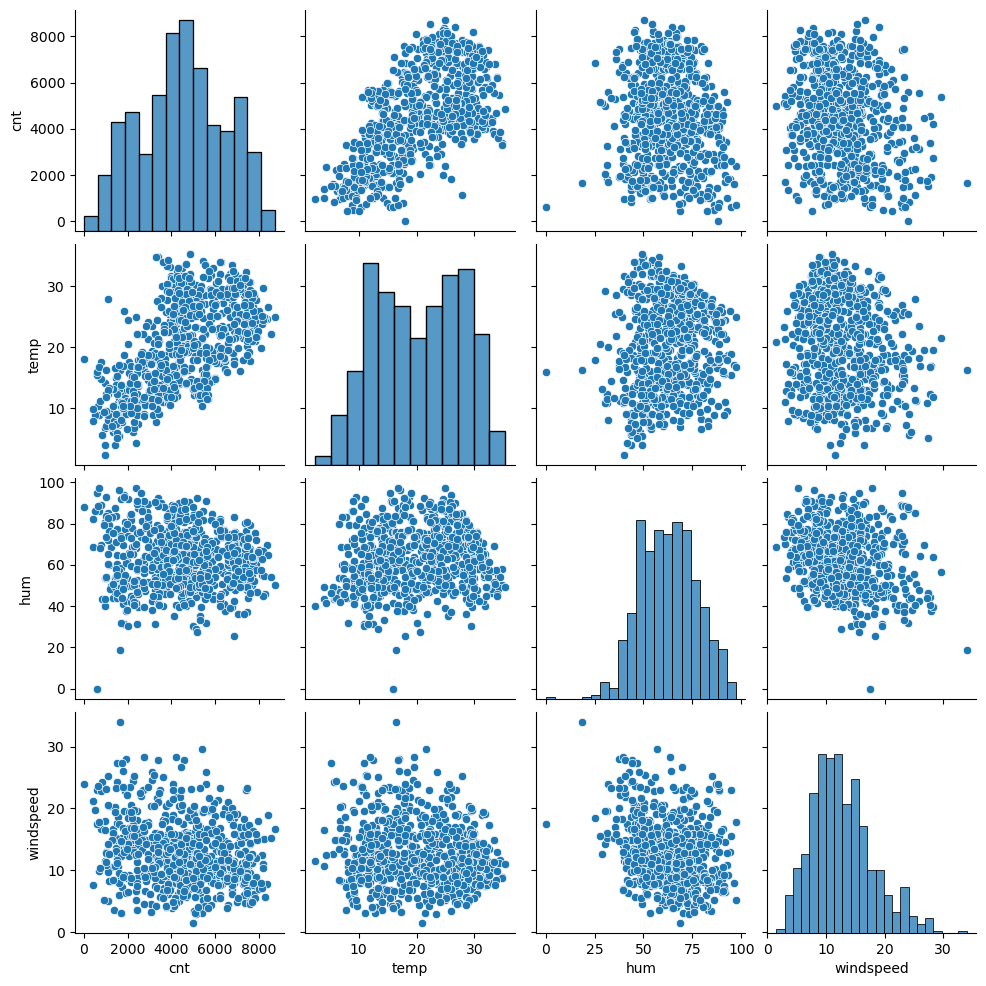

In [710]:
sns.pairplot(data=bikes,vars=['cnt', 'temp', 'hum','windspeed'])

<Axes: xlabel='holiday', ylabel='cnt'>

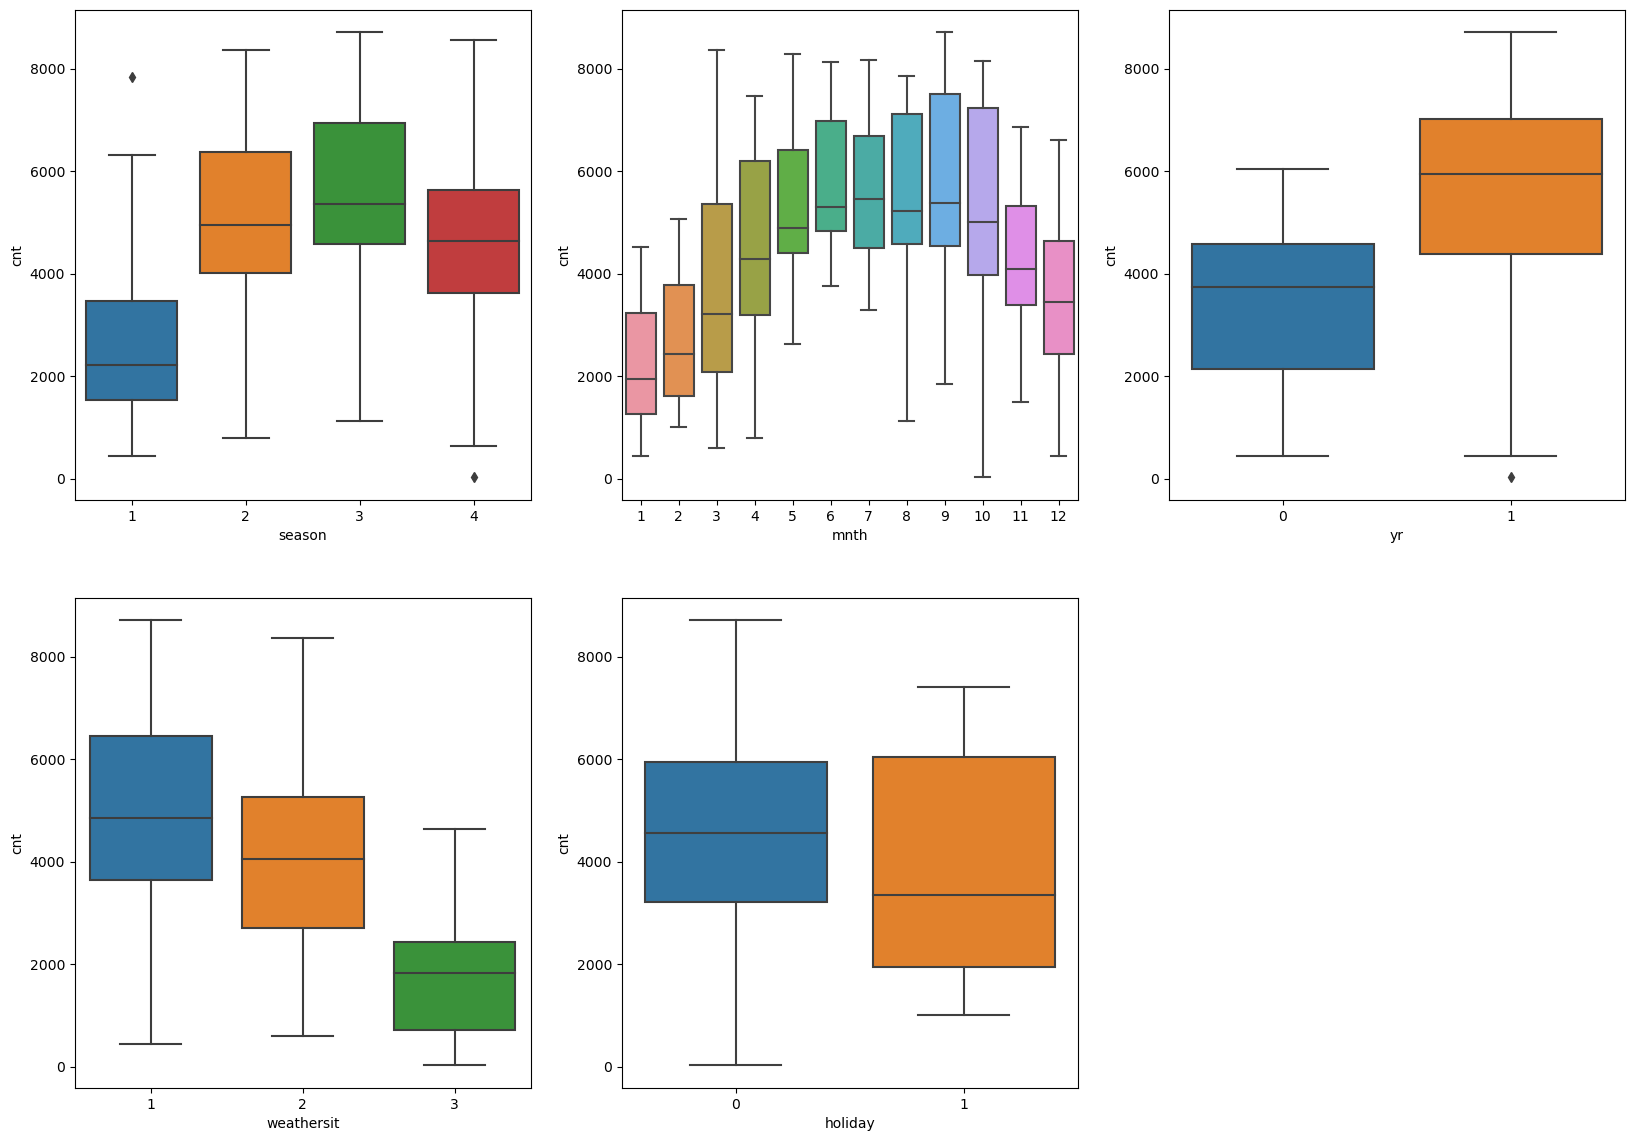

In [711]:
## For few categorical variables, suggestion in course is to draw sub plot
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)



In [712]:
## Few observations on above results


#### 
In holidays, bike sharing cnts are less in number

In 2019, number of bike shares is more

In months belonging to summer season cnt values increase

In spring, bikes sharing ccnt values are least

### Preparing the data

In [713]:
## Assuming few columns are to be dropped
## casual and registered count is not required as of now to understand the business insights
## into the usecase as required to study how to increase the bike shares
## instant and dteday are specific values which cannot tell us how to increase the share
bikes.drop(['casual','registered','instant','dteday'],axis = 1,inplace = True) 

In [714]:
## Numeric values for week day, month, weather sit and season can be changed as per data dictionary
bikes.weekday = bikes.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bikes['mnth'] = bikes['mnth'].apply(lambda x: calendar.month_name[x])
bikes.weathersit = bikes.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bikes.season = bikes.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [715]:
bikes.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,January,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,January,0,Friday,1,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,January,0,Saturday,0,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,January,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,January,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [716]:
## Dummy Variables Introduction in the data set

In [717]:
dummy_cols = bikes[['season','mnth','weekday','weathersit']]
dummy_cols = pd.get_dummies(dummy_cols,drop_first=True )
bikes = pd.concat([dummy_cols,bikes],axis = 1)

In [718]:
bikes.head(20)

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,True,False,False,False,False,False,True,False,False,False,...,January,0,Thursday,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,True,False,False,False,False,False,True,False,False,False,...,January,0,Friday,1,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,True,False,False,False,False,False,True,False,False,False,...,January,0,Saturday,0,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,True,False,False,False,False,False,True,False,False,False,...,January,0,Sunday,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,True,False,False,False,False,False,True,False,False,False,...,January,0,Monday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [719]:
## Dummy Variables Introduced as above

In [720]:
## Now drop the columns which have dummy variables

In [721]:
bikes.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

### Split the data into train and test sections

In [722]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling

In [723]:
## Simple Max Min scaling chosen by me for this assignment

In [724]:
from sklearn.preprocessing import MinMaxScaler
mnmxScal = MinMaxScaler()

In [725]:
## starting with training data for rescaling, only numeric columns other than dummy ones
num_cols = ['cnt','hum','windspeed','temp','atemp']
train[num_cols] = mnmxScal.fit_transform(train[num_cols])

In [726]:
train.head(20)

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,False,False,False,...,False,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,False,True,False,False,False,False,False,False,False,False,...,False,True,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095
580,False,False,False,True,False,False,False,False,False,False,...,False,False,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559
500,False,True,False,False,False,False,False,False,False,False,...,False,False,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588
479,False,True,False,False,False,False,False,False,False,False,...,False,False,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308
472,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885


In [727]:
## Simply plotting a heat map to understand strong correlation

<Axes: >

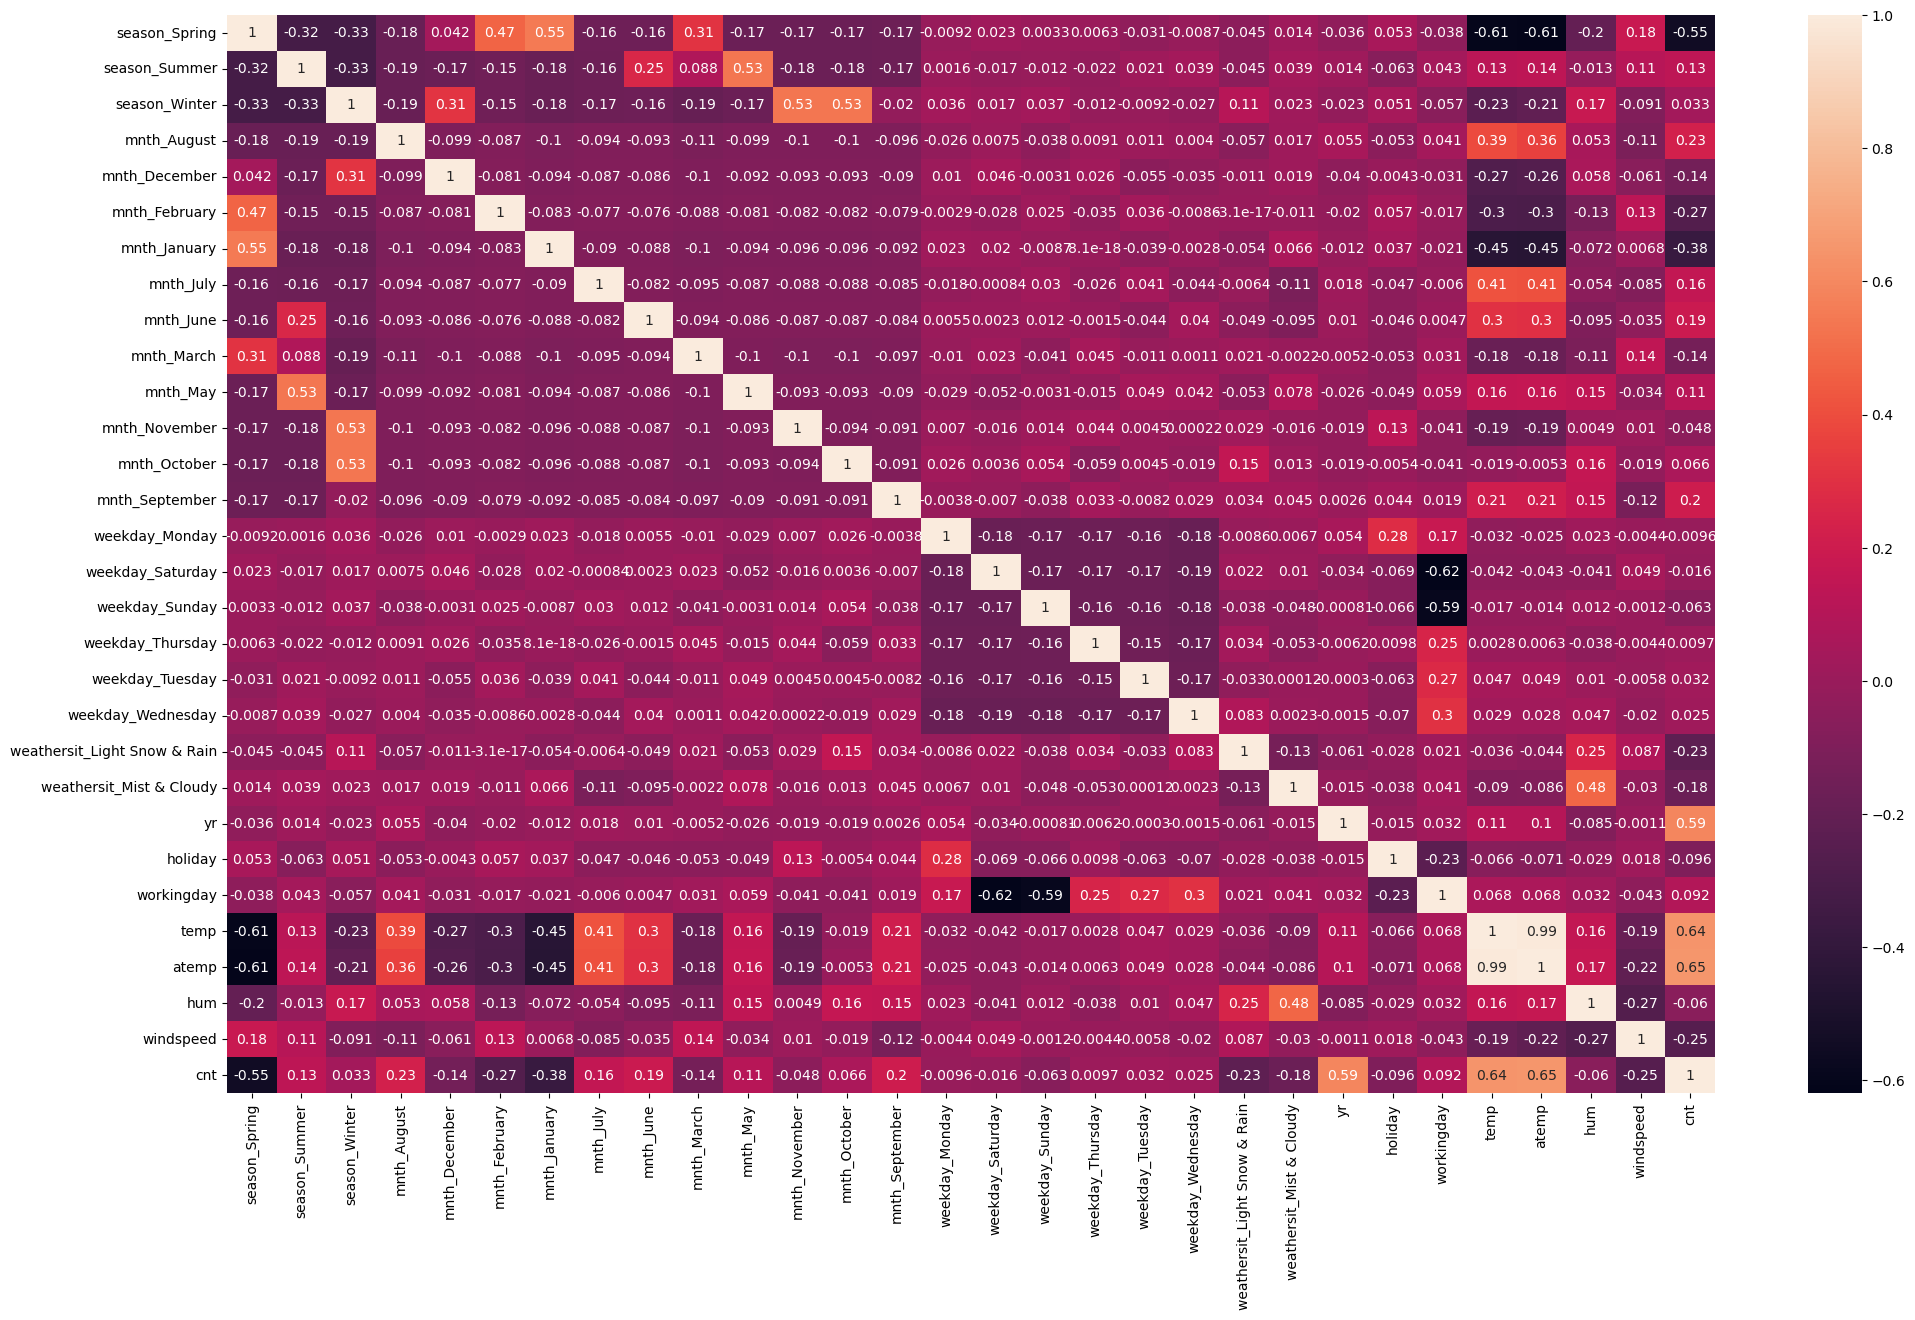

In [728]:
plt.figure(figsize = (24, 14))
sns.heatmap(train.corr(), annot = True)

In [729]:
## X and Y data sets creation for building a model

In [730]:
y_tr = train.pop('cnt')
x_tr = train

### First Model Creation

In [731]:
## RFE is the easiest to try

In [732]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [733]:
lm = LinearRegression()
lm.fit(x_tr, y_tr)
rf = RFE(lm)             
rf = rf.fit(x_tr, y_tr)

In [734]:
## let us start with columns now

In [735]:
x_tr.columns[~rf.support_]
xc = x_tr.columns[rf.support_]

In [736]:
## create test data set now

In [737]:
x_tr_rf = x_tr[xc]

In [738]:
x_tr_rf = sm.add_constant(x_tr_rf)

In [739]:
print(y_tr.describe())

count    510.000000
mean       0.513620
std        0.224593
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64


In [740]:
## start with fitting

In [741]:
print(x_tr_rf.describe())

       const          yr     holiday        temp       atemp         hum  \
count  510.0  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     1.0    0.507843    0.025490    0.537262    0.512989    0.650369   
std      0.0    0.500429    0.157763    0.225844    0.212385    0.145882   
min      1.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.0    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.0    1.000000    0.000000    0.540519    0.526811    0.653714   
75%      1.0    1.000000    0.000000    0.735215    0.688457    0.754830   
max      1.0    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed  
count  510.000000  
mean     0.320768  
std      0.169797  
min      0.000000  
25%      0.199179  
50%      0.296763  
75%      0.414447  
max      1.000000  


In [742]:
lm = sm.OLS(y_tr,x_tr_rf.astype(float)).fit()

In [743]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.87e-187
Time:                        23:10:11   Log-Likelihood:                 507.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     495   BIC:                            -922.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3516      0.032     11.119      0.000       0.289       0.414
season_Spring                   -0.1011      0.016     -6.516      0.000      -0.132      -0.071
season_Winter                    0.0615      0.014      4.535      0.000       0.035       0.088
mnth_January                    -0.0388      0.018     -2.198      0.028      -0.074      -0.004
mnth_July                       -0.0759      0.017     -4.395      0.000      -0.110      -0.042
mnth_November                   -0.0310      0.017     -1.788      0.074      -0.065       0.003
mnth_September                   0.0599      0.016      3.839      0.000       0.029       0.091
weathersit_Light Snow & Rain    -0.2452      0.027     -9.219      0.000      -0.297      -0.193
weathersit_Mist & Cloudy        -0.0554      0.011     -5.244      0.000      -0.076      -0.035
yr                               0.2312      0.008     28.282      0.000       0.215       0.247
holiday                         -0.0909      0.026     -3.507      0.000      -0.142      -0.040
temp                             0.3685      0.129      2.846      0.005       0.114       0.623
atemp                            0.0973      0.136      0.714      0.475      -0.170       0.365
hum                             -0.1585      0.038     -4.173      0.000      -0.233      -0.084
windspeed                       -0.1723      0.026     -6.571      0.000      -0.224      -0.121
==============================================================================
Omnibus:                       60.581   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.390
Skew:                          -0.620   Prob(JB):                     9.88e-33
Kurtosis:                       5.324   Cond. No.                         75.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [744]:
lm.params

const                           0.351616
season_Spring                  -0.101135
season_Winter                   0.061535
mnth_January                   -0.038847
mnth_July                      -0.075927
mnth_November                  -0.030985
mnth_September                  0.059896
weathersit_Light Snow & Rain   -0.245164
weathersit_Mist & Cloudy       -0.055434
yr                              0.231156
holiday                        -0.090903
temp                            0.368526
atemp                           0.097262
hum                            -0.158510
windspeed                      -0.172333
dtype: float64

In [745]:
## dropping atemp having very high p-value > 0.05

In [746]:
x_tr_nw = x_tr_rf.drop(["atemp"], axis = 1)

In [747]:
### Next again build the model

In [748]:
x_tr_lm = sm.add_constant(x_tr_nw)

In [749]:
lm = sm.OLS(y_tr,x_tr_lm.astype(float)).fit()

In [750]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.67e-188
Time:                        23:10:11   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3532      0.032     11.203      0.000       0.291       0.415
season_Spring                   -0.1012      0.016     -6.521      0.000      -0.132      -0.071
season_Winter                    0.0622      0.014      4.601      0.000       0.036       0.089
mnth_January                    -0.0395      0.018     -2.241      0.025      -0.074      -0.005
mnth_July                       -0.0759      0.017     -4.398      0.000      -0.110      -0.042
mnth_November                   -0.0312      0.017     -1.800      0.072      -0.065       0.003
mnth_September                   0.0597      0.016      3.830      0.000       0.029       0.090
weathersit_Light Snow & Rain    -0.2467      0.026     -9.315      0.000      -0.299      -0.195
weathersit_Mist & Cloudy        -0.0557      0.011     -5.277      0.000      -0.076      -0.035
yr                               0.2311      0.008     28.293      0.000       0.215       0.247
holiday                         -0.0916      0.026     -3.538      0.000      -0.142      -0.041
temp                             0.4582      0.032     14.345      0.000       0.395       0.521
hum                             -0.1566      0.038     -4.136      0.000      -0.231      -0.082
windspeed                       -0.1755      0.026     -6.790      0.000      -0.226      -0.125
==============================================================================
Omnibus:                       59.405   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.947
Skew:                          -0.607   Prob(JB):                     3.35e-32
Kurtosis:                       5.312   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [751]:
## above output shows F stat value increased and prob of F stat decreased

In [752]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vi = pd.DataFrame()
x_v = x_tr_nw.astype(float)
vi['Feat'] = x_v.columns
vi['VIFs'] = [variance_inflation_factor(x_v.values, i) for i in range(x_v.shape[1])]

In [753]:
vi

,Feat,VIFs
0,const,61.624698
1,season_Spring,2.745563
2,season_Winter,2.121175
3,mnth_January,1.551859
4,mnth_July,1.305426
5,mnth_November,1.466502
6,mnth_September,1.114482
7,weathersit_Light Snow & Rain,1.241778
8,weathersit_Mist & Cloudy,1.557637
9,yr,1.034097


In [754]:
x_tr_nw = x_tr_nw.drop(['const'], axis=1)
x_tr_lm = sm.add_constant(x_tr_nw)
lm = sm.OLS(y_tr,x_tr_lm.astype(float)).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.67e-188
Time:                        23:10:11   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3532      0.032     11.203      0.000       0.291       0.415
season_Spring                   -0.1012      0.016     -6.521      0.000      -0.132      -0.071
season_Winter                    0.0622      0.014      4.601      0.000       0.036       0.089
mnth_January                    -0.0395      0.018     -2.241      0.025      -0.074      -0.005
mnth_July                       -0.0759      0.017     -4.398      0.000      -0.110      -0.042
mnth_November                   -0.0312      0.017     -1.800      0.072      -0.065       0.003
mnth_September                   0.0597      0.016      3.830      0.000       0.029       0.090
weathersit_Light Snow & Rain    -0.2467      0.026     -9.315      0.000      -0.299      -0.195
weathersit_Mist & Cloudy        -0.0557      0.011     -5.277      0.000      -0.076      -0.035
yr                               0.2311      0.008     28.293      0.000       0.215       0.247
holiday                         -0.0916      0.026     -3.538      0.000      -0.142      -0.041
temp                             0.4582      0.032     14.345      0.000       0.395       0.521
hum                             -0.1566      0.038     -4.136      0.000      -0.231      -0.082
windspeed                       -0.1755      0.026     -6.790      0.000      -0.226      -0.125
==============================================================================
Omnibus:                       59.405   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.947
Skew:                          -0.607   Prob(JB):                     3.35e-32
Kurtosis:                       5.312   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [755]:
## as const was having high VIF so dropping the same

In [756]:
## again calculating VIF

In [757]:
vi = pd.DataFrame()
x_v = x_tr_nw.astype(float)
vi['Feat'] = x_v.columns
vi['VIFs'] = [variance_inflation_factor(x_v.values, i) for i in range(x_v.shape[1])]

In [758]:
vi

,Feat,VIFs
0,season_Spring,2.912991
1,season_Winter,2.593692
2,mnth_January,1.664425
3,mnth_July,1.408239
4,mnth_November,1.587884
5,mnth_September,1.209946
6,weathersit_Light Snow & Rain,1.217064
7,weathersit_Mist & Cloudy,2.235639
8,yr,2.066951
9,holiday,1.059146


In [759]:
x_tr_nw = x_tr_nw.drop(['hum'], axis=1)
x_tr_lm = sm.add_constant(x_tr_nw)
lm = sm.OLS(y_tr,x_tr_lm.astype(float)).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.86e-186
Time:                        23:10:11   Log-Likelihood:                 498.90
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     497   BIC:                            -916.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2696      0.025     10.966      0.000       0.221       0.318
season_Spring                   -0.1039      0.016     -6.599      0.000      -0.135      -0.073
season_Winter                    0.0515      0.013      3.817      0.000       0.025       0.078
mnth_January                    -0.0433      0.018     -2.422      0.016      -0.079      -0.008
mnth_July                       -0.0683      0.017     -3.915      0.000      -0.103      -0.034
mnth_November                   -0.0282      0.018     -1.604      0.109      -0.063       0.006
mnth_September                   0.0567      0.016      3.585      0.000       0.026       0.088
weathersit_Light Snow & Rain    -0.2895      0.025    -11.680      0.000      -0.338      -0.241
weathersit_Mist & Cloudy        -0.0807      0.009     -9.174      0.000      -0.098      -0.063
yr                               0.2349      0.008     28.477      0.000       0.219       0.251
holiday                         -0.0926      0.026     -3.519      0.000      -0.144      -0.041
temp                             0.4273      0.032     13.542      0.000       0.365       0.489
windspeed                       -0.1464      0.025     -5.795      0.000      -0.196      -0.097
==============================================================================
Omnibus:                       62.130   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.383
Skew:                          -0.637   Prob(JB):                     2.21e-33
Kurtosis:                       5.336   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [760]:
## dropped hum as having high VIF

In [761]:
vi = pd.DataFrame()
x_v = x_tr_nw.astype(float)
vi['Feat'] = x_v.columns
vi['VIFs'] = [variance_inflation_factor(x_v.values, i) for i in range(x_v.shape[1])]
vi

,Feat,VIFs
0,season_Spring,2.253115
1,season_Winter,1.917691
2,mnth_January,1.601540
3,mnth_July,1.357046
4,mnth_November,1.586237
5,mnth_September,1.209100
6,weathersit_Light Snow & Rain,1.082999
7,weathersit_Mist & Cloudy,1.528919
8,yr,2.063784
9,holiday,1.059077


In [762]:
vi['VIFs'] = round(vi['VIFs'], 2)
vi = vi.sort_values(by = "VIFs", ascending = True)

In [763]:
vi

,Feat,VIFs
9,holiday,1.06
6,weathersit_Light Snow & Rain,1.08
5,mnth_September,1.21
3,mnth_July,1.36
7,weathersit_Mist & Cloudy,1.53
4,mnth_November,1.59
2,mnth_January,1.60
1,season_Winter,1.92
8,yr,2.06
0,season_Spring,2.25


### Residual Analysis

In [764]:
y_tr_cnt_val = lm.predict(x_tr_lm)

In [765]:
## plotting a histogram and check the distribution

Text(0.5, 0, 'Errors')

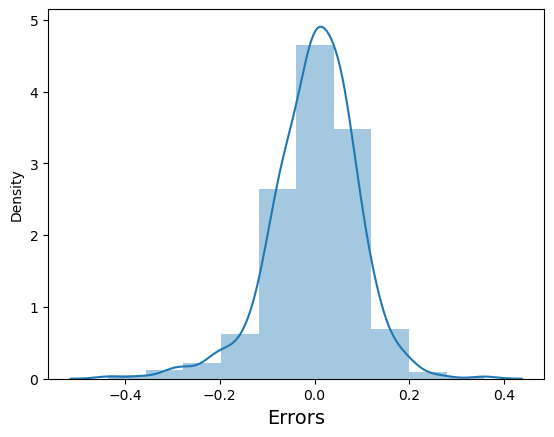

In [766]:
fig = plt.figure()
sns.distplot((y_tr - y_tr_cnt_val), bins = 10)                
plt.xlabel('Errors', fontsize = 14)                         

### Predictions

In [767]:
## Repeating the same scaling on test data , just like training data

In [768]:
num_cols = ['cnt','hum','windspeed','temp','atemp']


test[num_cols] = mnmxScal.transform(test[num_cols])

In [769]:
test.head(20)

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,False,False,False,False,False,False,False,True,False,False,...,False,True,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,False,True,False,False,False,False,False,False,True,False,...,False,False,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,False,False,True,False,False,False,False,False,False,False,...,False,True,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,False,True,False,False,False,False,False,False,True,False,...,False,False,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029
404,True,False,False,False,False,True,False,False,False,False,...,False,False,1,0,1,0.256524,0.240105,0.579218,0.326196,0.438104
198,False,False,False,False,False,False,False,True,False,False,...,False,False,0,0,1,0.856704,0.820207,0.671103,0.372990,0.510354
171,False,False,False,False,False,False,False,False,True,False,...,False,True,0,0,1,0.774672,0.733207,0.793903,0.276724,0.553728
512,False,True,False,False,False,False,False,False,False,False,...,False,False,1,1,0,0.814131,0.787883,0.696865,0.331536,0.692706
200,False,False,False,False,False,False,False,True,False,False,...,False,False,0,0,1,0.883701,0.876552,0.728638,0.153738,0.495858


In [770]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [771]:
## repeating the same process for test data

In [772]:
y_test = test.pop('cnt')
x_test = test

In [773]:
x_test = sm.add_constant(x_test)

In [774]:
test_columns = x_tr_lm.columns
x_test=x_test[test_columns[1:]]
x_test = sm.add_constant(x_test)

In [775]:
y_predict = lm.predict(x_test)

In [776]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.8075151048368827

### Final step Prediction

Text(0, 0.5, 'y_predict')

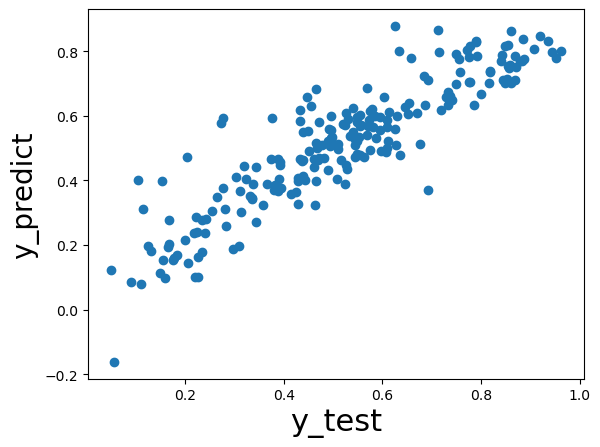

In [777]:
fig = plt.figure()
plt.scatter(y_test, y_predict)             
plt.xlabel('y_test', fontsize = 22)                          
plt.ylabel('y_predict', fontsize = 20) 

In [778]:
parameters = pd.DataFrame(lm.params)
parameters.insert(0,'Var',parameters.index)
parameters.rename(columns = {0:'Coeff'},inplace = True)
parameters['index'] = list(range(0,13))
parameters.set_index('index',inplace = True)
print(parameters)

                                Var     Coeff
index                                        
0                             const  0.269646
1                     season_Spring -0.103913
2                     season_Winter  0.051483
3                      mnth_January -0.043349
4                         mnth_July -0.068300
5                     mnth_November -0.028210
6                    mnth_September  0.056748
7      weathersit_Light Snow & Rain -0.289469
8          weathersit_Mist & Cloudy -0.080704
9                                yr  0.234898
10                          holiday -0.092562
11                             temp  0.427323
12                        windspeed -0.146437



### The negative coefficients indicate that an increase in such values will ensure in decreasing the cnt value.


### The positive coefficients indicate that an increase in such values will ensure in increasing the cnt value

### Temp is having highest coefficient hence have value of most significance
### In September, bike rentals are maximum
### In holidays, there is a reduction in renting of bikes
### There are other variables having positive coefficient such as year as well